In [98]:
# eda_analysis.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

df = pd.read_csv("data/raw_analyst_ratings_1.csv")
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,NaN
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,NaN
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,NaN
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,NaN
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,NaN


In [ ]:
# Descriptive Statistics


# Headline length stats
df['headline_length'] = df['headline'].apply(len)
print(df['headline_length'].describe())

count    4580.000000
mean       69.650437
std        39.135938
min        12.000000
25%        44.000000
50%        60.000000
75%        83.000000
max       383.000000
Name: headline_length, dtype: float64


In [ ]:
# Articles per publisher

print("\nTop Publishers:")
print(df['publisher'].value_counts().head(10))


Top Publishers:
publisher
Benzinga Staff       517
Paul Quintaro        465
Lisa Levin           436
Benzinga Newsdesk    409
Monica Gerson        286
Charles Gross        214
webmaster            138
Hal Lindon           119
Zacks                109
Eddie Staley          97
Name: count, dtype: int64


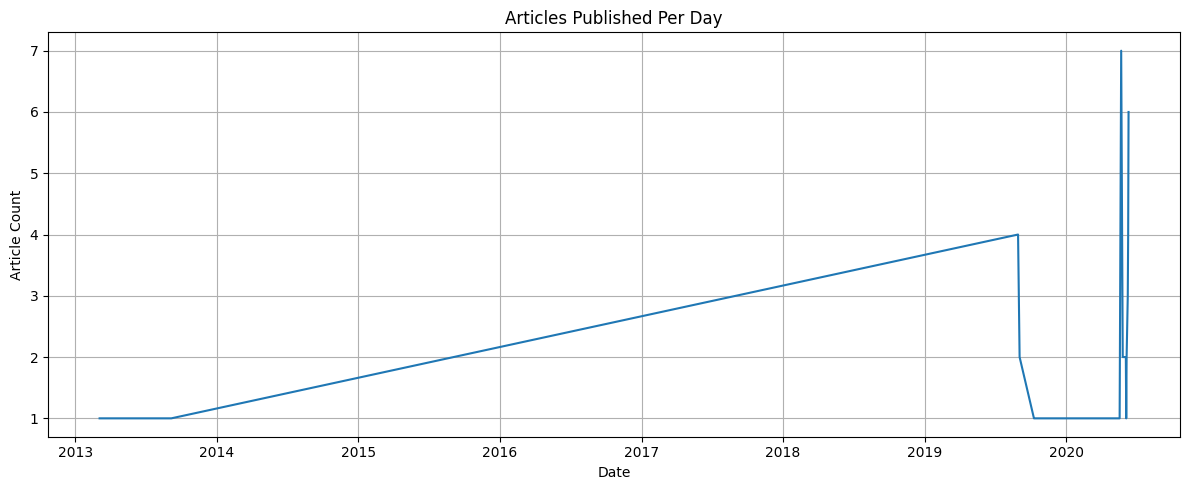

In [ ]:
# Publication date trends

df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Will convert invalid dates to NaT
daily_counts = df.dropna().groupby(df['date'].dt.date).size()
df['date'] = pd.to_datetime(df['date'])
daily_counts = df.groupby(df['date'].dt.date).size()


plt.figure(figsize=(12, 5))
daily_counts.plot(title="Articles Published Per Day")
plt.xlabel("Date")
plt.ylabel("Article Count")
plt.grid(True)
plt.tight_layout()
plt.show()

In [102]:
# Text Analysis (Topic Modeling with NMF)

# Fill NaN titles
df['headline'] = df['headline'].fillna("")
# TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X = tfidf.fit_transform(df['headline'])
# Topic modeling
nmf = NMF(n_components=5, random_state=42)
nmf.fit(X)


NMF(n_components=5, random_state=42)

In [ ]:
# Display top words in each topic

feature_names = tfidf.get_feature_names_out()
for topic_idx, topic in enumerate(nmf.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

Topic 1: alcoa, earnings, aa, season, scheduled, preview, ahead, aluminum, expectations, shares
Topic 2: stocks, watch, session, moving, week, 52, 10, hit, thursday, july
Topic 3: market, news, stock, 2010, 2011, benzinga, pre, morning, futures, summary
Topic 4: agilent, technologies, pt, maintains, raises, target, buy, price, lowers, morgan
Topic 5: vs, est, reports, eps, results, quarter, 2009, second, sales, adj


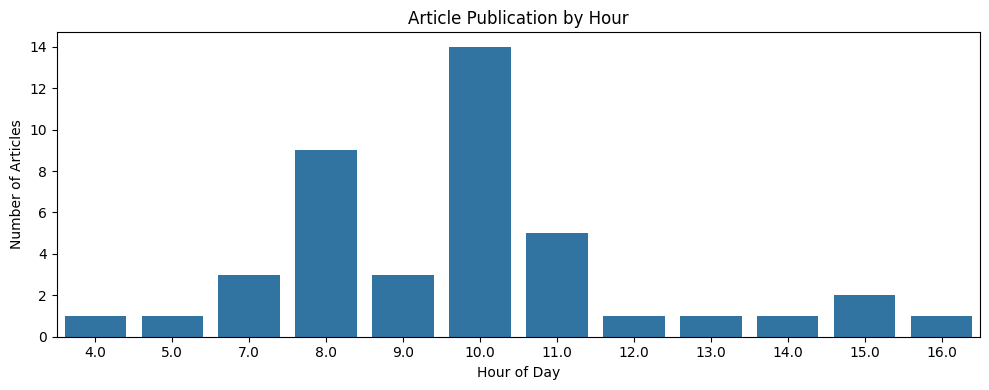

In [ ]:
# Time Series Analysis

# Hour of publication (if timestamp includes time)

if 'date' in df.columns:
    df['hour'] = pd.to_datetime(df['date']).dt.hour
    plt.figure(figsize=(10, 4))
    sns.countplot(x='hour', data=df, order=sorted(df['hour'].dropna().unique()))
    plt.title("Article Publication by Hour")
    plt.xlabel("Hour of Day")
    plt.ylabel("Number of Articles")
    plt.tight_layout()
    plt.show()

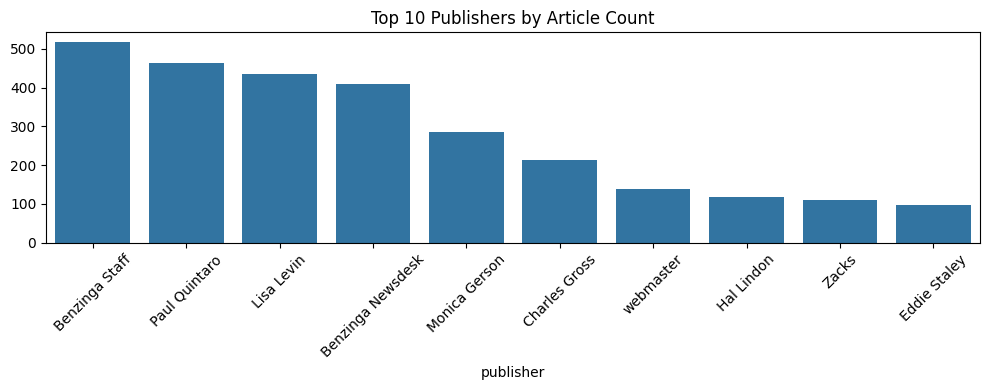

In [ ]:
# Publisher Analysis


# Publisher frequency

top_publishers = df['publisher'].value_counts().head(10)

plt.figure(figsize=(10, 4))
sns.barplot(x=top_publishers.index, y=top_publishers.values)
plt.title("Top 10 Publishers by Article Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Extract email domains (if applicable)

df['domain'] = df['publisher'].astype(str).str.extract(r'@([\w\.-]+)')
print("Top Domains from Publisher Emails:")
print(df['domain'].value_counts().head(10))


Top Domains from Publisher Emails:
domain
benzinga.com    21
gmail.com        1
Name: count, dtype: int64
